# **INTRODUCTION**

In this notebook, I implement Linear Regression using only NumPy, without using any machine learning libraries.

The goal is to deeply understand how gradient descent works to minimize Mean Squared Error (MSE), and to visualize how the model learns over time.


## Data Overview

I use a simple dataset of salaries based on years of experience. My goal is use Linear Regression to fit a line to predict the salary from experience time.

Features:
- `YearsExperience`: number of years in a role
- `Salary`: annual salary in dollars


# **1. IMPORT LIBRARIES**


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **2. LOAD DATASET**

In [6]:
df = pd.read_csv('data/Salary_dataset.csv', index_col=0)
org_df = df.copy()

# **3. UNDERSTANDING DATA**
**First Look at the data:**
-  the Type of Data
- Null Numbers
- Unique values
- The first rows of our dataset
- Data Distribution

**Summary**
- The dataset has 2 numeric columns
- The average years of experience is 5.413
- The average salary is $760004

In [7]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 720.0 bytes


In [9]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [10]:
df.shape

(30, 2)

The dataset includes 30 rows and 2 attributes

In [11]:
df.columns.values

array(['YearsExperience', 'Salary'], dtype=object)

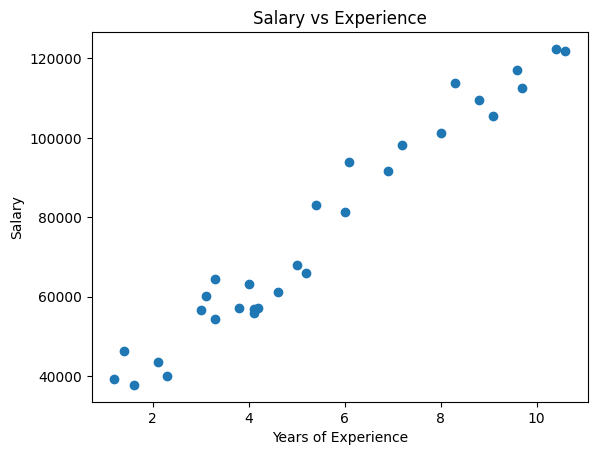

In [12]:
plt.scatter(df["YearsExperience"], df["Salary"])
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience")
plt.show()

# **4. MATH BEHIND LINEAR REGRESSION**


We model the relationship as:  `y_pred = Xw + b`

The Loss function formula (Using 1/2 version): $L(w, b) = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}^{(i)} - y^{(i)})^2$

Gradient Descent Updates:

For w:
$\frac{\partial L}{\partial w} = \frac{1}{n} X^\top (Xw + b - y)$

For b:
$\frac{\partial L}{\partial b} = \frac{1}{n} \sum (Xw + b - y)$


In [13]:
class LinearRegression():

    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs
            
    def fit(self, X, y):
        self.m, self.n = X.shape # m: number of data, n: number of features

        # weight:
        self.w = np.zeros(self.n)

        self.b = 0.0

        self.X = X

        self.y = y

        # Gradient descent
        for epoch in range(self.epochs):
            if epoch % 100 == 0:
                y_pred = self.predict(self.X)
                loss = self.compute_loss(y_pred, self.y)
                print(f"Epoch {epoch}: Loss = {loss:.4f}")
            self.update_weights()
        
    def update_weights(self):
        y_pred = self.predict(self.X)

        dw = (1 / self.m) * np.dot(self.X.T, (y_pred - self.y))
        db = (1 / self.m) * np.sum(y_pred - self.y)

        self.w -= self.learning_rate* dw
        self.b -= self.learning_rate* db
    
    def compute_loss(self, y_pred, y_true):
        return np.mean((y_pred - y_true) ** 2)
    def r2_score(self, y_true, y_pred):
        ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
        ss_res = np.sum((y_true - y_pred) ** 2)
        return 1 - (ss_res / ss_total)

    def rmse(self, y_true, y_pred):
        return np.sqrt(np.mean((y_pred - y_true) ** 2))
        
    def predict(self, X):
        return np.dot(X, self.w) + self.b

## Evaluation Metrics

We use:

- RMSE (Root Mean Squared Error)
- R² Score (explained variance)


In [14]:
model = LinearRegression(learning_rate=0.01, epochs=1000)
X = df[["YearsExperience"]].values
y = df["Salary"].values
model.fit(X, y)
pred = model.predict(X)

print("RMSE:", model.rmse(y, pred))
print("R² Score:", model.r2_score(y, pred))

Epoch 0: Loss = 6503107277.7333
Epoch 100: Loss = 104651526.5361
Epoch 200: Loss = 79900672.9241
Epoch 300: Loss = 63498142.5036
Epoch 400: Loss = 52628092.9929
Epoch 500: Loss = 45424449.8148
Epoch 600: Loss = 40650554.8123
Epoch 700: Loss = 37486867.6429
Epoch 800: Loss = 35390274.2951
Epoch 900: Loss = 34000850.0471
RMSE: 5751.5276886977135
R² Score: 0.9544664771235531


##  Model Evaluation Summary

###  RMSE (Root Mean Squared Error)

- Salary values in the dataset range from approximately **35,000 to 120,000**
- The model's RMSE is **5,750**, which means predictions are, on average, off by only ~$5.7k
- This is a **relatively low error**, indicating the model fits the data well and captures the underlying linear trend


###  R² Score (Coefficient of Determination)

- Ranges from **0 to 1**:
  - `1.0` → perfect prediction
  - `0.0` → model explains no variance
  - `< 0` → worse than predicting the mean
- The trained `LinearRegression` model scores **`R² = 0.9544`**, which means:
  - **~95.4%** of the variation in salaries is explained by years of experience
  - This is a **very strong score**, especially for a **single-feature linear model**





## Visualize Model Fit


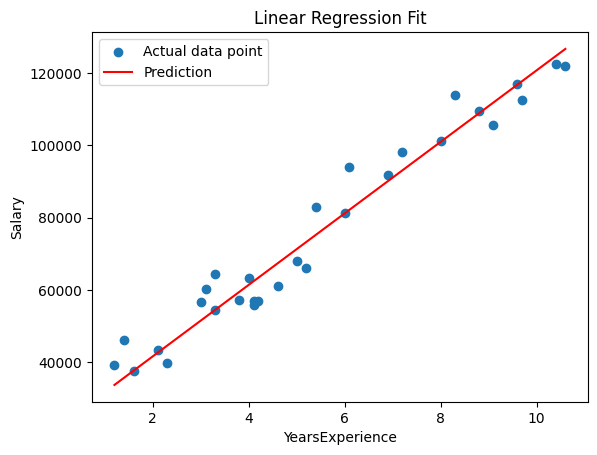

In [16]:
plt.scatter(X, y, label="Actual data point")
plt.plot(X, pred, color="red", label="Prediction")
plt.legend()
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Linear Regression Fit")
plt.show()